In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.datasets import load_iris
import data_acquisition as da
import time

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [2]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [4]:
# Importing the data through the data_acquisition file
xdat, ydat = da.labels_multiclass('./dataset')
# Normalizing the data
x = np.array(xdat)
y = np.array(ydat)
x /= 255
# Converting the 3 dimensional features to one dimension
for i in range(x.shape[0]):
    x[i] = np.reshape(x[i], (512, 512, 1))

In [5]:
# Splitting the data onto a test and a train set
xtrain, xval, ytrain, yval = train_test_split(x, y, train_size=0.85, random_state=15) 

In [6]:
print(xtrain.shape)

(2550, 512, 512, 1)


In [7]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(512,512,1)))
#cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [8]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 128)    

In [13]:
start_time = time.time()
final_model = cnn_model.fit(xtrain, ytrain, batch_size=10, epochs=10, validation_data=(xval, yval))
classifier3_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier3_time))

Train on 2550 samples, validate on 450 samples
Epoch 1/10
2550/2550 [==============================] - 24s 10ms/step - loss: 0.8390 - accuracy: 0.6624 - val_loss: 0.6583 - val_accuracy: 0.7378s: 0.8389 - accuracy - ETA: 0s - loss: 0.8397 - accuracy: 0.66
Epoch 2/10
2550/2550 [==============================] - 24s 9ms/step - loss: 0.4784 - accuracy: 0.8165 - val_loss: 0.5164 - val_accuracy: 0.7978
Epoch 3/10
2550/2550 [==============================] - 24s 9ms/step - loss: 0.3245 - accuracy: 0.8788 - val_loss: 0.4641 - val_accuracy: 0.8267
Epoch 4/10
2550/2550 [==============================] - 24s 9ms/step - loss: 0.1979 - accuracy: 0.9239 - val_loss: 0.6268 - val_accuracy: 0.8000
Epoch 5/10
2550/2550 [==============================] - 23s 9ms/step - loss: 0.1708 - accuracy: 0.9376 - val_loss: 0.6303 - val_accuracy: 0.8156
Epoch 6/10
2550/2550 [==============================] - 23s 9ms/step - loss: 0.1399 - accuracy: 0.9427 - val_loss: 0.7491 - val_accuracy: 0.8289
Epoch 7/10
2550/2550

In [ ]:
#classification_report(ytest, )

In [ ]:
# final_model = KerasClassifier(build_fn=cnn_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(final_model, xtrain, ytrain, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [14]:
y_pred_train1 = cnn_model.predict_classes(xtrain)
y_pred_val1 = cnn_model.predict_classes(xval)

# Getting accuracy results

In [21]:
y_pred_train1

array([1, 1, 1, ..., 3, 3, 1], dtype=int64)

In [22]:
rounded_ytrain = np.argmax(ytrain, axis=1)
rounded_yval = np.argmax(yval, axis=1)
#rounded_y_pred_train1 = np.argmax(y_pred_train1, axis=1)
#rounded_y_pred_val1 = np.argmax(y_pred_val1, axis=1)
rounded_ytrain[1]
# 2

1

The accuracy of the train set: 
0.9984313725490196
The accuracy of the validation set: 
0.8377777777777777
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.78      0.83      0.80       149
   pituitary       0.80      0.73      0.77       120
      glioma       0.95      0.97      0.96       116
  meningioma       0.84      0.82      0.83        65

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450

The confusion matrix: 


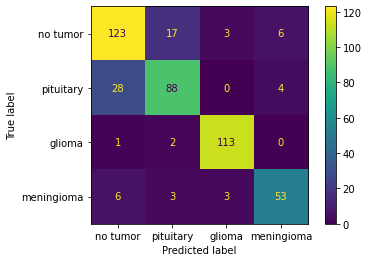

In [30]:
#print(accuracy_score(ytest, final_model))
#y_val_pred = cnn_model.predict_classes(xval)
#print(accuracy_score(yval, y_val_pred))

print('The accuracy of the train set: ')
print(accuracy_score(rounded_ytrain, y_pred_train1))
print('The accuracy of the validation set: ')
print(accuracy_score(rounded_yval, y_pred_val1))

print('The classification report: ')
print(classification_report(rounded_yval, y_pred_val1, target_names=['no tumor', 'pituitary', 'glioma', 'meningioma']))

print('The confusion matrix: ')
conf_mat1 = confusion_matrix(rounded_yval, y_pred_val1, labels=[0, 1, 2, 3])
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'pituitary', 'glioma', 'meningioma'])
cm_disp1.plot()

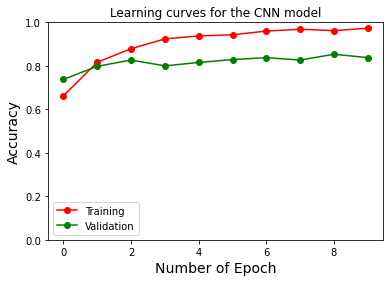

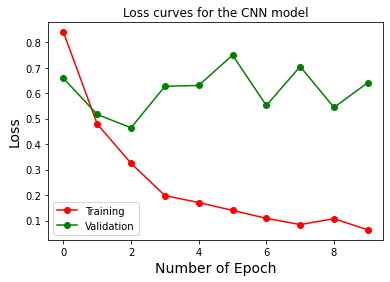

In [31]:
plt.plot(final_model.history['accuracy'], 'o-', color="r", label = 'Training error')
plt.plot(final_model.history['val_accuracy'], 'o-', color="g", label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Number of Epoch', fontsize = 14)
plt.ylim((0,1))
plt.title('Learning curves for the CNN model')
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

plt.plot(final_model.history['loss'], 'o-', color="r", label = 'Training')
plt.plot(final_model.history['val_loss'], 'o-', color="g", label = 'Validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Number of Epoch', fontsize = 14)
plt.legend(['Training', 'Validation'], loc='lower left')
plt.title('Loss curves for the CNN model')
plt.show()

# Testing the Model with the Test Data

In [39]:
# Importing the data through the data_acquisition file
x2dat, y2dat = da.labels_multiclass('./test')
x2 = np.array(x2dat)
y2 = np.array(y2dat)
# Normalizing the data
x2 /= 255
# Converting the 3 dimensional features to one dimension
for i in range(x2.shape[0]):
    x2[i] = np.reshape(x2[i], (512, 512, 1))

In [40]:
y2_test_pred = cnn_model.predict_classes(x2)

In [55]:
rounded_y2 = np.argmax(y2, axis=1)

The accuracy of the test set: 
0.885
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.87      0.85      0.86        68
   pituitary       0.85      0.81      0.83        43
      glioma       0.93      0.98      0.95        52
  meningioma       0.89      0.89      0.89        37

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.89      0.88       200

The confusion matrix: 


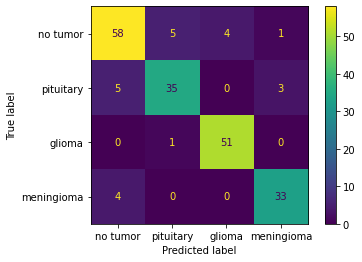

In [49]:
print('The accuracy of the test set: ')
print(accuracy_score(rounded_y2, y2_test_pred))

print('The classification report: ')
print(classification_report(rounded_y2, y2_test_pred, target_names=['no tumor', 'pituitary', 'glioma', 'meningioma']))

print('The confusion matrix: ')
conf_mat1 = confusion_matrix(rounded_y2, y2_test_pred, labels=[0, 1, 2, 3])
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'pituitary', 'glioma', 'meningioma'])
cm_disp1.plot()